# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [0]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# import sys
# import os
# path='/content/drive/My Drive/INSAID/TensorFlow/Getting started with TensorFlow 2/Week5/notebooks'
# sys.path.append(path)
# os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

In [4]:
# Let's see the keys in the dictionary

print(train.keys())
print(test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

### Extract the training and testing images and labels separately from the train and test dictionaries

In [5]:
# Extracting training and test images and corresponding labels

train_images, train_labels = train['X'], train['y']
test_images, test_labels = test['X'], test['y']

print("Train Data : ",train_images.shape, train_labels.shape)
print("Test Data : ",test_images.shape, test_labels.shape)

Train Data :  (32, 32, 3, 73257) (73257, 1)
Test Data :  (32, 32, 3, 26032) (26032, 1)


#### No. of samples is the 4th dimension, lets bring it back as the first dimesion (as usual)

In [6]:
train_images = train_images.transpose((3, 0, 1, 2))
test_images = test_images.transpose((3, 0, 1, 2))
print("Train Data : ",train_images.shape, train_labels.shape)
print("Test Data : ",test_images.shape, test_labels.shape)

Train Data :  (73257, 32, 32, 3) (73257, 1)
Test Data :  (26032, 32, 32, 3) (26032, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Plot a random sample of images (alteast 10)

def plot_images(image, labels, row=1, col=10):
    '''
    Plot a random row * col images.
    '''
    fig, ax = plt.subplots(row, col)
    
    indexes = np.random.randint(1, image.shape[0], row*col)
    
    x=0;
    for i, ax in enumerate(ax.flat):
        img_index = indexes[i]
        
        if image[img_index].shape == (32,32,3):
            ax.imshow(image[img_index])
            ax.set_title(labels[img_index][0])
        else:
            ax.imshow(image[img_index, :, :, 0])
            ax.set_title(np.argmax(labels[img_index]))
            
        ax.set_xticks([]); ax.set_yticks([])
        
#         plt.tight_layout()

### Select a random sample of images and corresponding labels from the dataset (at least 10)

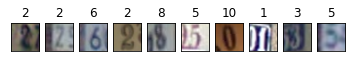

In [9]:
# Plot 10 train images

plot_images(train_images, train_labels)

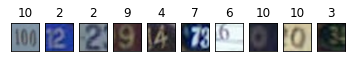

In [10]:
# Plot 10 test images

plot_images(test_images, test_labels)

In [11]:
# Lets check how may unique numbers in output

print('Train :',np.unique(train_labels))
print('Test :',np.unique(test_labels))

Train : [ 1  2  3  4  5  6  7  8  9 10]
Test : [ 1  2  3  4  5  6  7  8  9 10]


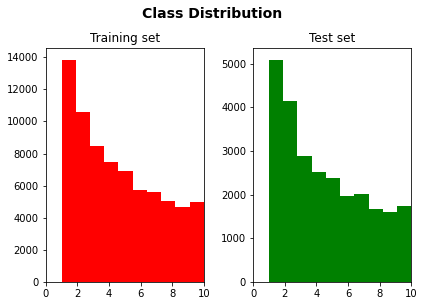

In [12]:
# Let see the distribution of the labels/classes
def plot_class_distribution(ytrain, ytest):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

    ax1.hist(ytrain, bins=10, color='r')
    ax1.set_title("Training set")
    ax1.set_xlim(0, 10)

    ax2.hist(ytest, bins=10, color='g')
    ax2.set_title("Test set")

    fig.tight_layout()
    
plot_class_distribution(train_labels, test_labels)    

#### Both the plots show right skewness, which means we have high number of images for lower values when compared to high values

In [0]:
# For simpicity of programming, lets convert the class 10 as class 0
test_labels[test_labels == 10] = 0
train_labels[train_labels == 10] = 0

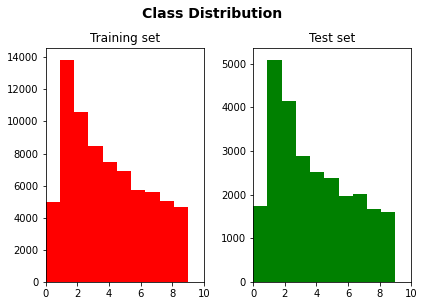

In [14]:
plot_class_distribution(train_labels, test_labels)

### Convert the training and test images to grayscale by taking the average across all colour channels for each pixel

In [0]:
# Convert the training and test images to grayscale by taking the average across all colour channels for each pixel

def rgb2grayscale(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=images.ndim-1)

In [16]:
train_images_grayscale = rgb2grayscale(train_images)
test_images_grayscale = rgb2grayscale(test_images)

print("Train (grayscale) :", train_images_grayscale.shape)
print("Test (grayscale) :", test_images_grayscale.shape)

Train (grayscale) : (73257, 32, 32, 1)
Test (grayscale) : (26032, 32, 32, 1)


### Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10)

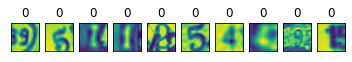

In [17]:
# Lets plot the gray scaled images

plot_images(train_images_grayscale, train_labels)

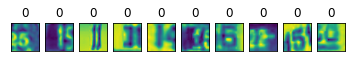

In [18]:
plot_images(test_images_grayscale, test_labels)

### Data Normalization

In [0]:
# Lets normalize the data-set

# Mean and Std.Dev values
train_mean = np.mean(train_images_grayscale, axis=0)
train_std = np.std(train_images_grayscale, axis=0)

# Subt. mean and div. by std. dev
train_images_norm = (train_images_grayscale - train_mean) / train_std
test_images_norm = (test_images_grayscale - train_mean) / train_std

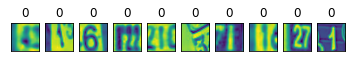

In [20]:
# Lets plot the gray scaled normalized images

plot_images(train_images_norm, train_labels)

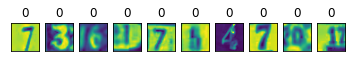

In [21]:
plot_images(test_images_norm, test_labels)

### Now, lets split the train images into train set and validation set

In [0]:
# Splitting the Training data into Train and Validation sets.
# 13% of train set gives around 9500 data having min. of 800 instances of each class
# Using random state to regenrate the whole Dataset in re-run

from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(train_images_norm, train_labels, test_size=.13, random_state=42)
xtest = test_images_norm # for same naming convention
ytest = test_labels

### One-Hot encoding target variable

In [0]:
# For model prediction purpose, lets one-hot encode the target varialble.
# Apply One Hot Encoding to make label suitable for CNN Classification

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder().fit(ytrain.reshape(-1,1))

y_train = ohe.transform(ytrain.reshape(-1,1)).toarray()
y_val = ohe.transform(yval.reshape(-1,1)).toarray()
y_test = ohe.transform(ytest.reshape(-1,1)).toarray() 

In [24]:
# ytrain.reshape(-1,1)
ohe.transform(ytrain[0].reshape(-1,1)).toarray()

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
print('y_train :', y_train.shape)
print('y_val :', y_val.shape)
print('y_test :', y_test.shape)

y_train : (63733, 10)
y_val : (9524, 10)
y_test : (26032, 10)


### Store the processed data to disk.

In [0]:
# Storing only the Grayscale Data not the RGB

import h5py

# Create file
h5f = h5py.File('SVHN_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=xtrain)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=xtest)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=xval)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

### Free-up RAM memory

In [0]:
# Lets delete all the data loaded into memory to free up some RAM mem.

del y_train, y_val, y_test, xtrain, xtest, xval, ytrain, ytest, yval, train_images_norm, test_images_norm, \
train_images_grayscale, test_images_grayscale, train_images, test_images, train_labels, test_labels, train, test

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [28]:
# Open file in read mode
import h5py
h5f = h5py.File('SVHN_grey.h5', 'r')

# Read the dataset into local variables
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close file
h5f.close()

print('Training set', x_train.shape, y_train.shape)
print('Validation set', x_val.shape, y_val.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


label: 1


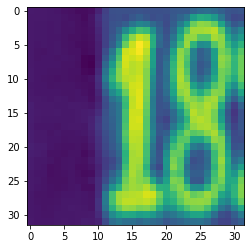

In [29]:
# Display one of the images

i = 0
labels = np.argmax(y_train[i])
img = x_train[i,:,:,0]
plt.imshow(img)
# plt.show()
print(f"label: {labels}")

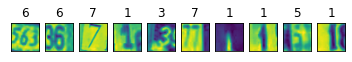

In [30]:
plot_images(x_train, y_train)

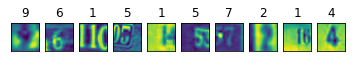

In [31]:
plot_images(x_test, y_test)

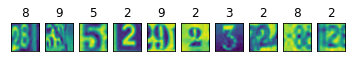

In [32]:
plot_images(x_val, y_val)

In [0]:
# import lib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

### Build and compile the model

In [0]:
# Build an MLP classifier model using the Sequential API.
# Model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output

def getModel(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape, name='Flatten'),
        Dense(128, activation='relu', name='Dense_1'),
        Dense(128, activation='relu', name='Dense_2'),
        Dense(128, activation='relu', name='Dense_3'),
        Dense(128, activation='relu', name='Dense_4'),
        Dense(128, activation='relu', name='Dense_5'),
        Dense(10, activation='softmax', name='Dense_6')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### Print out the model summary

In [35]:
print(x_train[0].shape)
model = getModel(x_train[0].shape)
model.summary()

(32, 32, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_6 (Dense)              (None, 10)     

In [36]:
print(f'Loss :{model.loss}')
print(f'Learning Rate :{model.optimizer.lr}, \nOptimizer: {model.optimizer}')
print(f'Mertrics : {model.metrics}')

Loss :categorical_crossentropy
Learning Rate :<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>, 
Optimizer: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fdabdf94d30>
Mertrics : []


### Custom Callback

In [0]:
class my_callback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
             
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finishing epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training:")
        
#  track at least one appropriate metric        
def checkpoint_getBestOnly():
    checkpoint_path='model_checkpoint/checkpoint'
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_freq='epoch',
                                 save_best_only=False, verbose=1,
                                 save_weights_only=True, monitor = 'val_accuracy',
                                )
    return checkpoint

### Train the model

In [38]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_val,y_val), batch_size=64,
                    callbacks=[my_callback(), checkpoint_getBestOnly()])

Starting training....
Starting epoch 0
Epoch 1/30
979/996 [============================>.] - ETA: 0s - loss: 1.5984 - accuracy: 0.4618Finishing epoch 0

Epoch 00001: saving model to model_checkpoint/checkpoint
996/996 [==============================] - 3s 3ms/step - loss: 1.5902 - accuracy: 0.4649 - val_loss: 1.0891 - val_accuracy: 0.6624
Starting epoch 1
Epoch 2/30
984/996 [============================>.] - ETA: 0s - loss: 0.9935 - accuracy: 0.6936Finishing epoch 1

Epoch 00002: saving model to model_checkpoint/checkpoint
996/996 [==============================] - 3s 3ms/step - loss: 0.9925 - accuracy: 0.6939 - val_loss: 0.9008 - val_accuracy: 0.7241
Starting epoch 2
Epoch 3/30
984/996 [============================>.] - ETA: 0s - loss: 0.8417 - accuracy: 0.7426Finishing epoch 2

Epoch 00003: saving model to model_checkpoint/checkpoint
996/996 [==============================] - 3s 3ms/step - loss: 0.8414 - accuracy: 0.7428 - val_loss: 0.7958 - val_accuracy: 0.7557
Starting epoch 3
Epoc

### Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


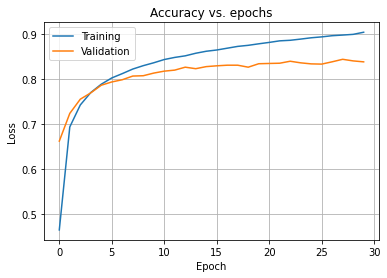

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()

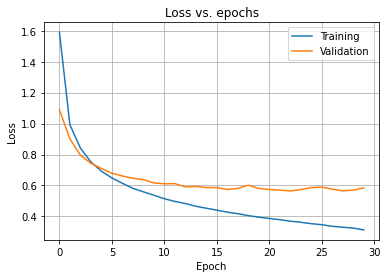

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()

In [42]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.590182,0.464924,1.089091,0.662432
1,0.992526,0.693926,0.900844,0.724066
2,0.841377,0.742771,0.795810,0.755670
3,0.752326,0.770449,0.743468,0.769740
4,0.692217,0.788995,0.710009,0.786749


### Compute and display the loss and accuracy of the trained model on the test set

In [43]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Loss : {loss:.3f} \nAccuracy :{accuracy:.3f}')

814/814 - 1s - loss: 0.7629 - accuracy: 0.8110
Loss : 0.763 
Accuracy :0.811


### Cleanup 

In [44]:
!ls -lh model_checkpoint
# !rm -r model_checkpoint

total 4.6M
-rw------- 1 root root   77 Jun  5 15:22 checkpoint
-rw------- 1 root root 2.3M May 20 20:15 checkpoint.data-00000-of-00001
-rw------- 1 root root 5.1K Jun  5 15:22 checkpoint.data-00000-of-00002
-rw------- 1 root root 2.3M Jun  5 15:22 checkpoint.data-00001-of-00002
-rw------- 1 root root 2.9K Jun  5 15:22 checkpoint.index


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

### Build a CNN classifier model using the Sequential API

In [0]:
def getCNNModel(inputshape, decayRate, dropRate):
    model = Sequential([
        Conv2D(16, kernel_size=3, padding='SAME', activation='relu', 
               kernel_initializer='he_uniform', kernel_regularizer=l2(decayRate), bias_initializer='ones',
               name='conv2d_1', input_shape=(inputshape)),
        
        Dropout(dropRate, name='dropout_1'),
        
        Conv2D(16, kernel_size=3, padding='SAME', activation='relu',
               kernel_regularizer=l2(decayRate), name='conv2d_2'),
        
        Dropout(dropRate, name='dropout_2'),
        BatchNormalization(name='batch_norm_1'),
        MaxPooling2D(pool_size=(4,4), name='max_pool_1'),
        
        Dense(128, activation='relu', name='dense_1'),
        Flatten(name='flatten_1'),
        Dense(10, activation='softmax', name='dense_2')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001), 
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [47]:
model = getCNNModel(x_train[0].shape, 0.001, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 32, 32, 16)        64        
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 8, 8, 16)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 8, 8, 128)        

In [48]:
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


In [0]:
def get_early_stopping():
    return EarlyStopping(patience=4, monitor='val_accuracy')

def get_best_CNN_checkpoint():
    path = 'model_checkpoint_CNN/checkpoint'
    return ModelCheckpoint(filepath=path, save_freq='epoch',
                               save_weights_only=True, save_best_only=True, 
                               monitor='val_accuracy', verbose=1)

In [50]:
history = model.fit(x_train, y_train, batch_size=256, epochs=30,
                   validation_data=(x_val,y_val),
                   callbacks=[get_early_stopping(), get_best_CNN_checkpoint()])

Epoch 1/30
249/249 [==============================] - ETA: 0s - loss: 2.2233 - accuracy: 0.2351
Epoch 00001: val_accuracy improved from -inf to 0.35395, saving model to model_checkpoint_CNN/checkpoint
249/249 [==============================] - 4s 16ms/step - loss: 2.2233 - accuracy: 0.2351 - val_loss: 2.0795 - val_accuracy: 0.3539
Epoch 2/30
244/249 [============================>.] - ETA: 0s - loss: 1.7315 - accuracy: 0.4427
Epoch 00002: val_accuracy improved from 0.35395 to 0.49717, saving model to model_checkpoint_CNN/checkpoint
249/249 [==============================] - 3s 10ms/step - loss: 1.7268 - accuracy: 0.4446 - val_loss: 1.6804 - val_accuracy: 0.4972
Epoch 3/30
247/249 [============================>.] - ETA: 0s - loss: 1.3205 - accuracy: 0.5957
Epoch 00003: val_accuracy improved from 0.49717 to 0.60038, saving model to model_checkpoint_CNN/checkpoint
249/249 [==============================] - 2s 10ms/step - loss: 1.3195 - accuracy: 0.5960 - val_loss: 1.3471 - val_accuracy: 0.

### Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


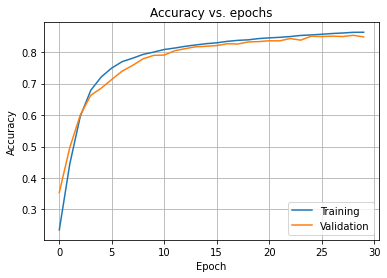

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()

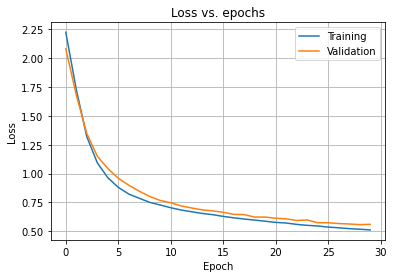

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()

In [54]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.223334,0.235059,2.079538,0.353948
1,1.726768,0.444558,1.680401,0.497165
2,1.319486,0.596049,1.347089,0.600378
3,1.093594,0.678895,1.150359,0.662957
4,0.964386,0.721416,1.044122,0.685636


### Compute and display the loss and accuracy of the trained model on the test set

In [55]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Loss : {loss:.3f} \nAccuracy :{accuracy:.3f}')

814/814 - 2s - loss: 0.6014 - accuracy: 0.8394
Loss : 0.601 
Accuracy :0.839


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

### Load the best weights for the MLP and CNN models


In [56]:
model_mlp = getModel(x_train[0].shape)
model_mlp.load_weights(filepath='model_checkpoint/checkpoint')

In [57]:
model_cnn = getCNNModel(x_train[0].shape, 0.001, 0.3)
model_cnn.load_weights(filepath='model_checkpoint_CNN/checkpoint')

### Randomly select 5 images and corresponding labels from the test set and display the images with their labels.

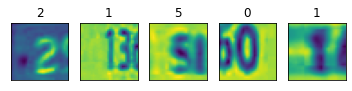

In [58]:
plot_images(x_test, y_test, 1, 5)

In [0]:
def plot_prediction_bars(predictions, images, labels):
    fig, axes = plt.subplots(5, 2, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=-0.2)

    for i, (prediction, image, label) in enumerate(zip(predictions, images, labels)):
        axes[i, 0].imshow(np.squeeze(image))
        axes[i, 0].get_xaxis().set_visible(False)
        axes[i, 0].get_yaxis().set_visible(False)
        axes[i, 0].text(0., -2.5, f'Digit {label}')
        axes[i, 1].bar(np.arange(len(prediction)), prediction)
        axes[i, 1].set_xticks(np.arange(len(prediction)))
        axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

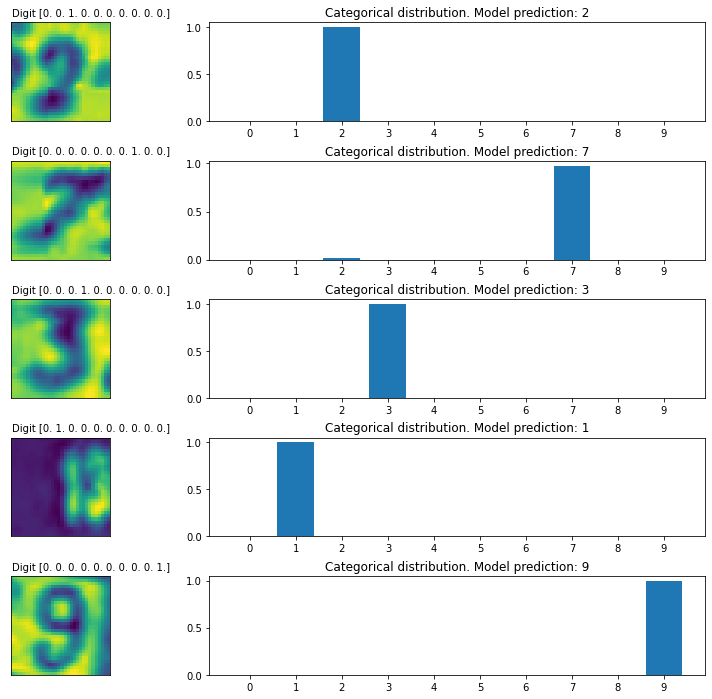

In [60]:
num_test_images = x_test.shape[0]    # Get the total no. of images
indexes = np.random.choice(num_test_images, 5) # Choose 5 random indexes
images = x_test[indexes, ...]  # Get the random 5 images
labels = y_test[indexes, ...]  # Get correspodig labels

predictions = model_mlp.predict(images)
plot_prediction_bars(predictions, images, labels)

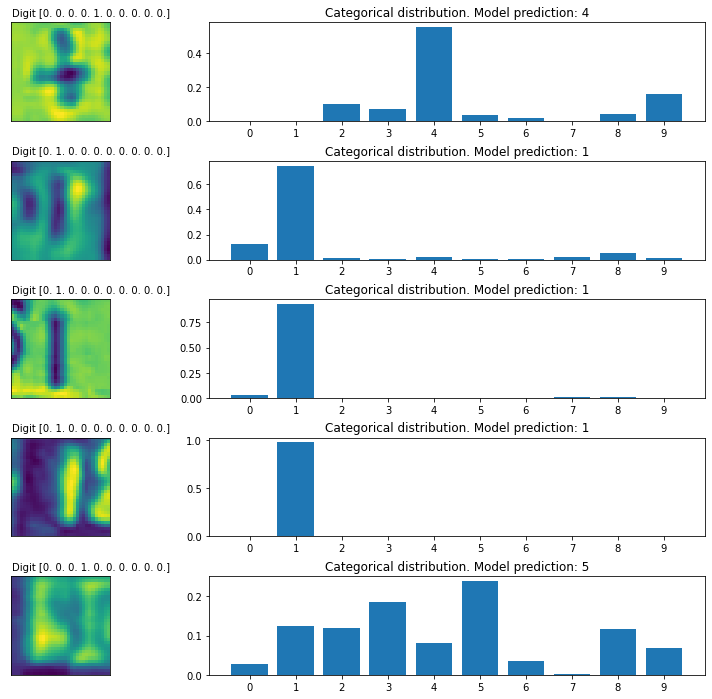

In [61]:
num_test_images = x_test.shape[0]    # Get the total no. of images
indexes = np.random.choice(num_test_images, 5) # Choose 5 random indexes
images = x_test[indexes, ...]  # Get the random 5 images
labels = y_test[indexes, ...]  # Get correspodig labels

predictions = model_cnn.predict(images)
plot_prediction_bars(predictions, images, labels)

In [0]:
# THANK YOU